# ML Project - 2 - (Predict automobile price using Machine Learning) 

## Name: Komal More

### Batch: DSAPR01

Use Machine learning to predict the price of a car based on several characteristics. The objective is to build a model to understand the factors that drive the car of the price. This will help your automobile company launch their new car in the market effectively by pricing it better. 
 
#### Tasks: 
 
 - Perform EDA on the data 
 -Perform data cleanup as required  
 -Pick the best variable for making a simple linear regression model 
 - Perform train test split - Build model using best variable and report the R2 
- Make a multiple regression model o Apply feature selection approaches discussed in the class
 - Final model should be interpretable o What is your understanding of the factors that drive price? 

In [161]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [162]:
df=pd.read_csv('Automobile Data.csv')

In [163]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [164]:
df.shape

(205, 25)

### Checking Null Values

In [165]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

-> Data Is Clean

### EDA

In [166]:
CompanyName = df['make'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['make'],axis=1,inplace=True)
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [167]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [168]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [169]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Box-Plot

In [170]:
num_var=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [171]:
num_varr=df[num_var]

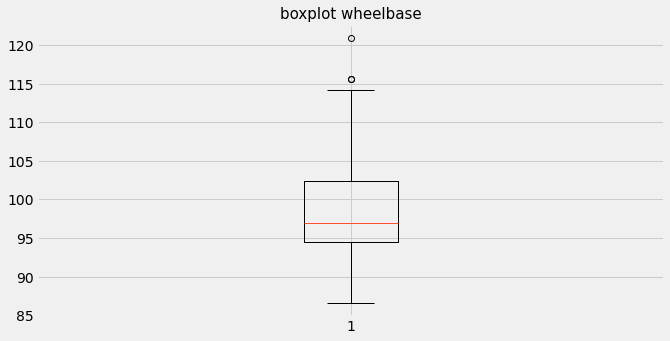

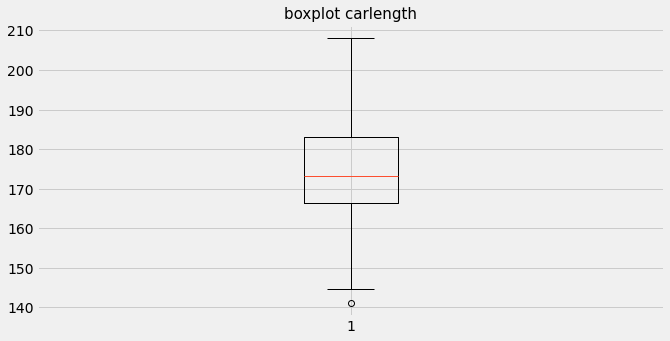

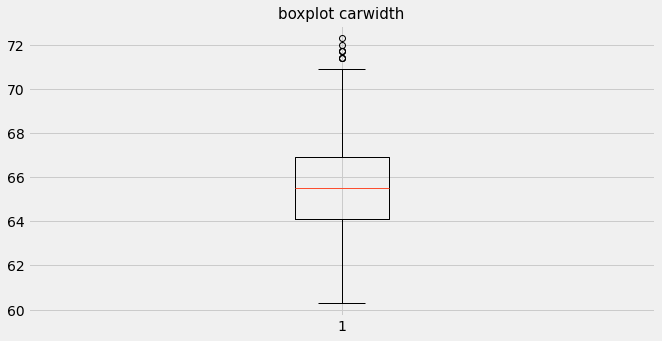

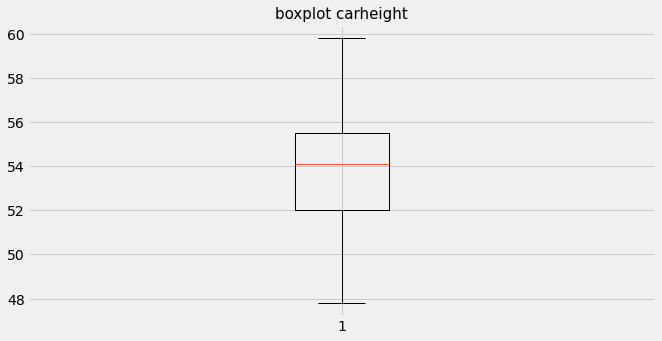

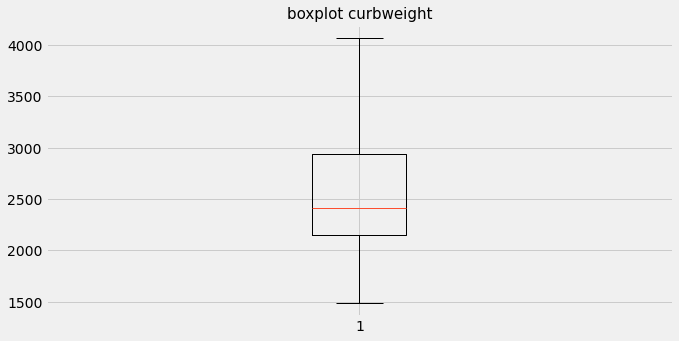

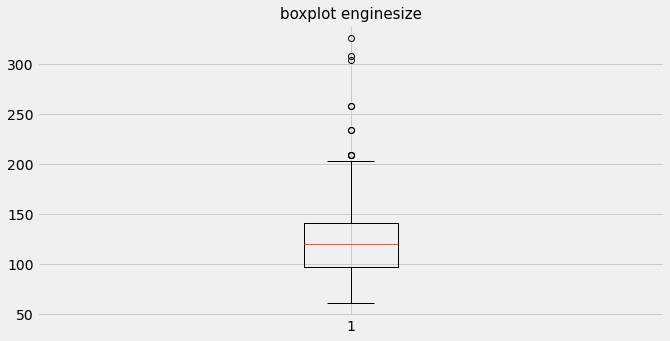

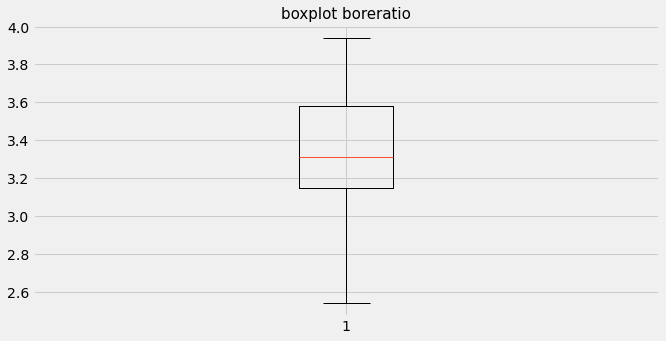

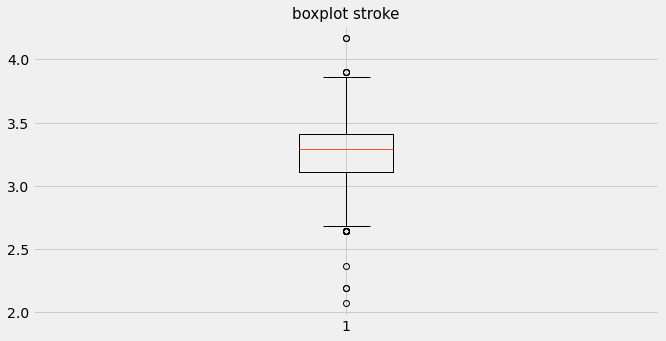

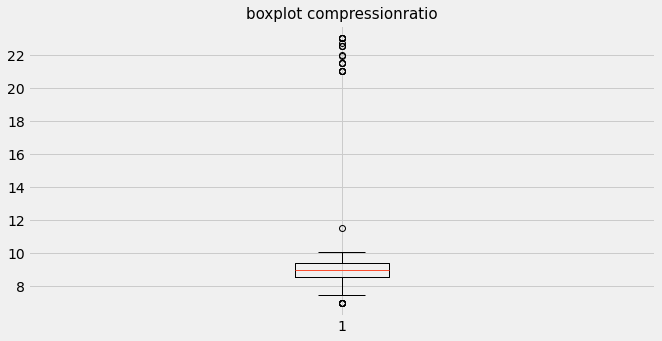

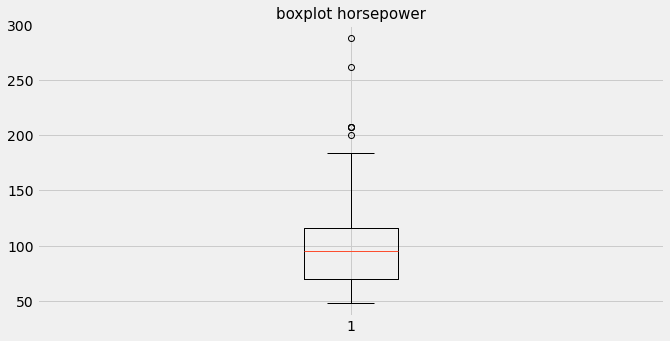

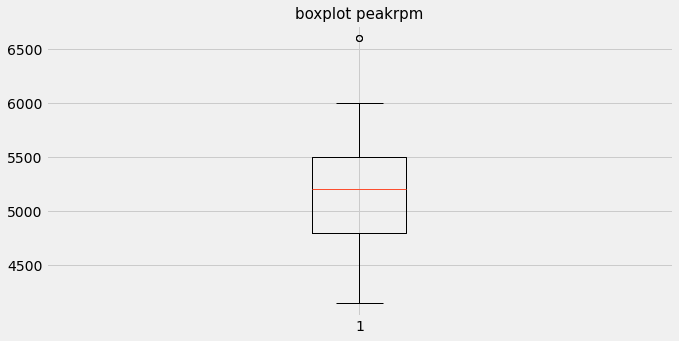

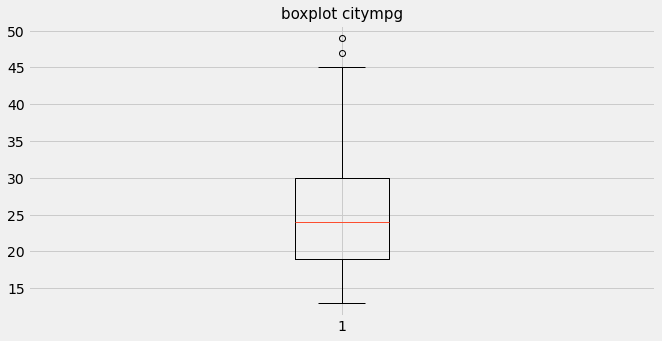

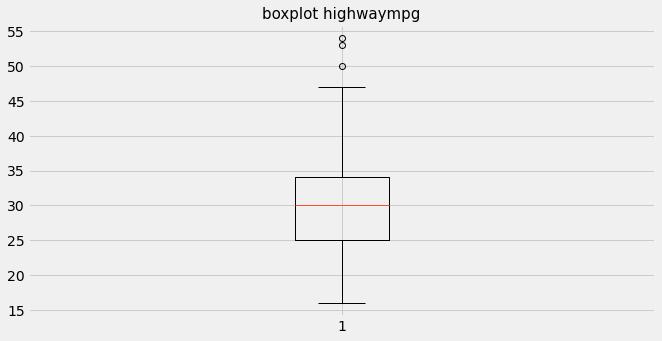

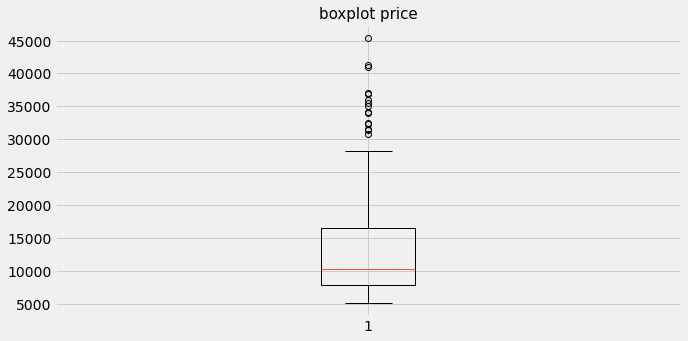

In [172]:
for i in num_var:
    plt.figure(figsize=(10,5))
    plt.style.use('fivethirtyeight')
    plt.boxplot(df[i])
    plt.title('boxplot '+i,fontsize=15);

### Visualising Categorical Variable

### Price Distribution

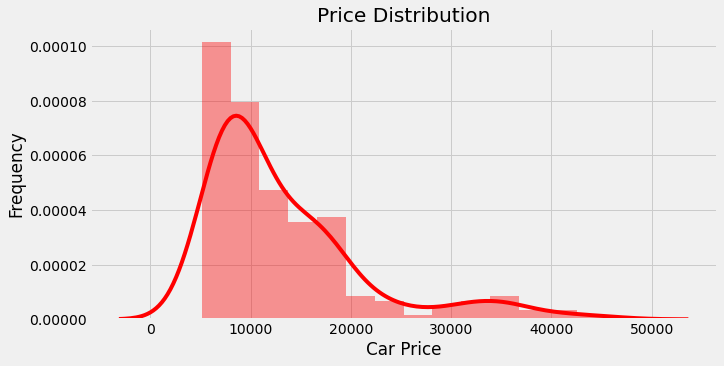

In [173]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
sns.distplot(df['price'],color='r')
plt.title('Price Distribution')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

### Fuel Type Wise Cars

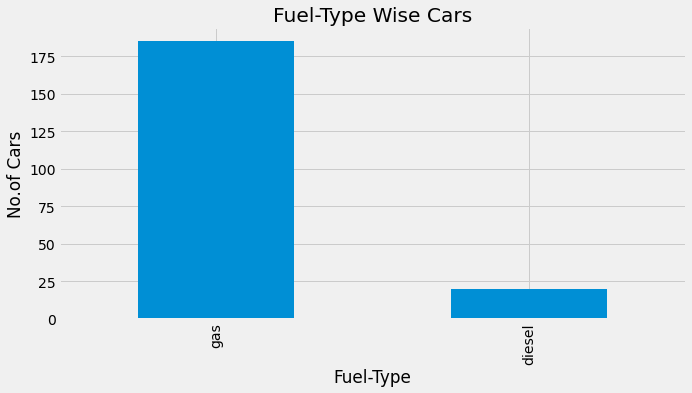

In [174]:
plt.figure(figsize=(10,5))
df['fueltype'].value_counts().plot.bar()
plt.title('Fuel-Type Wise Cars')
plt.ylabel('No.of Cars')
plt.xlabel('Fuel-Type');

-> We can see gas type car is more than diesel type cars

### Company-Wise Cars

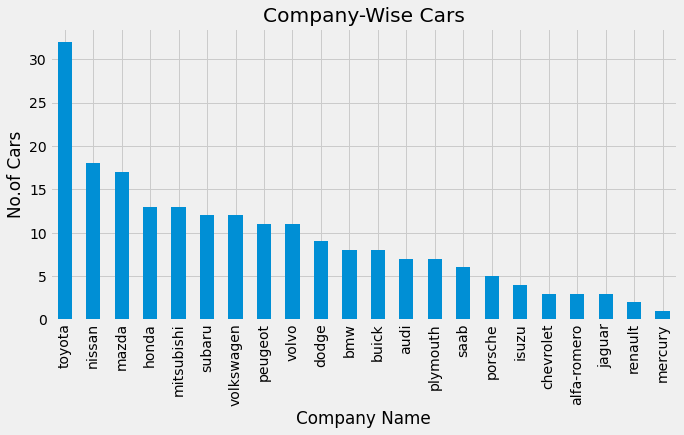

In [175]:
plt.figure(figsize=(10,5))
df['CompanyName'].value_counts().plot.bar()
plt.title('Company-Wise Cars')
plt.ylabel('No.of Cars')
plt.xlabel('Company Name');

-> As we see toyota car has more sell & mercury car has less sell

### Risk Factors of Cars

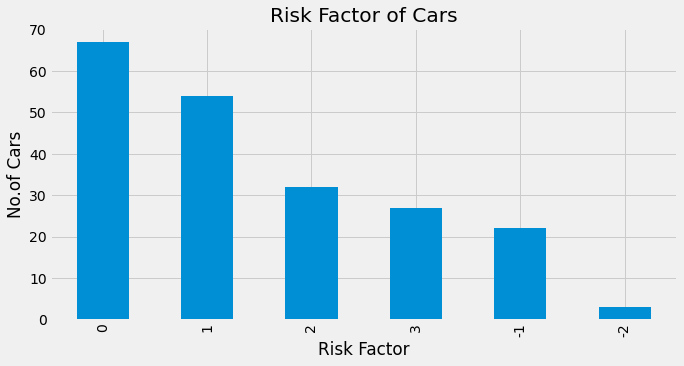

In [176]:
plt.figure(figsize=(10,5))
df['symboling'].value_counts().plot.bar()
plt.title('Risk Factor of Cars')
plt.ylabel('No.of Cars')
plt.xlabel('Risk Factor');

### Cars With Different Bodies

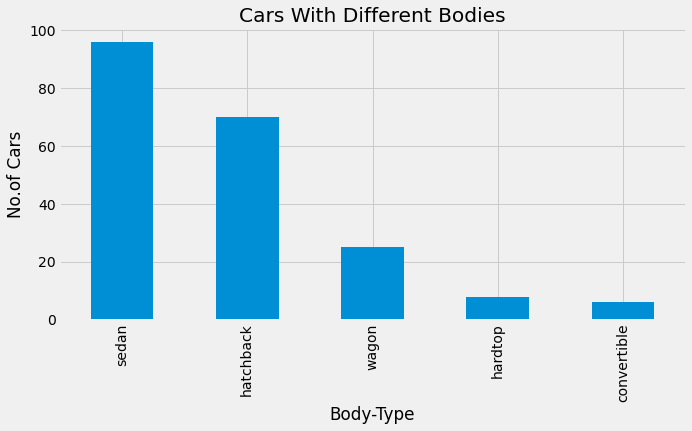

In [177]:
plt.figure(figsize=(10,5))
df['carbody'].value_counts().plot.bar()
plt.title('Cars With Different Bodies')
plt.ylabel('No.of Cars')
plt.xlabel('Body-Type');

-> Sedan type cars has highest sells

### Cars Based on Wheel Drive

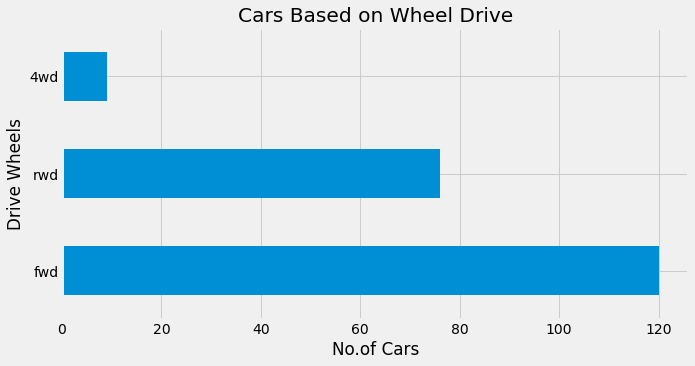

In [178]:
plt.figure(figsize=(10,5))
df['drivewheel'].value_counts().plot.barh()
plt.title('Cars Based on Wheel Drive')
plt.xlabel('No.of Cars')
plt.ylabel('Drive Wheels');

### Average Car Price of Each Company

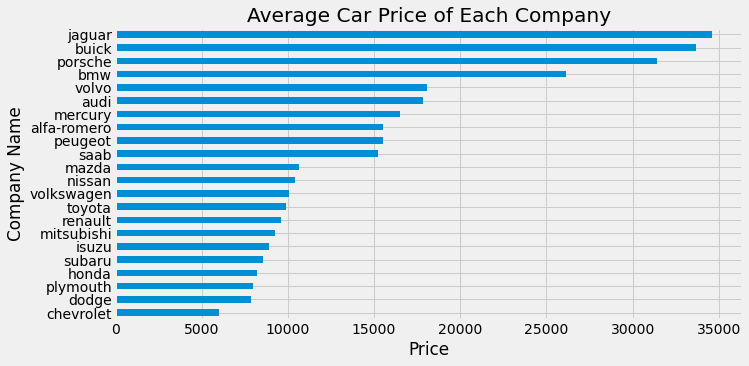

In [179]:
cc=df.groupby('CompanyName')['price'].mean()
kk=cc.sort_values(ascending=True)
plt.figure(figsize=(10,5))
kk.plot.barh()
plt.title('Average Car Price of Each Company')
plt.xlabel('Price')
plt.ylabel('Company Name');

-> Jaguar & Buick has highest average price among all other cars.

-> Dodge & Chevrolet has lowest average price among all other cars.

### Correlation Between Numerical Variables.

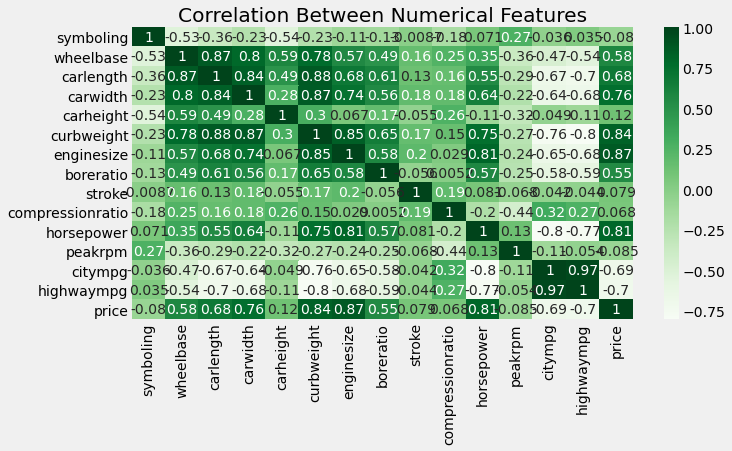

In [180]:
heat=df.corr()
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
sns.heatmap(heat,annot=True,cmap='Greens')
plt.title("Correlation Between Numerical Features");

-> Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and carlength.

### Numerical Variable Visualisation. 

In [181]:
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


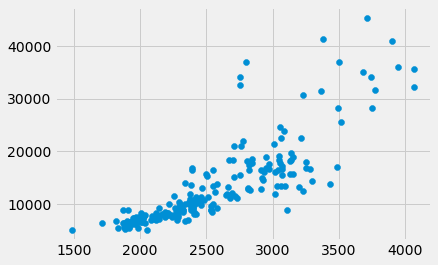

In [182]:
plt.scatter(x=df['curbweight'],y='price',data=df);

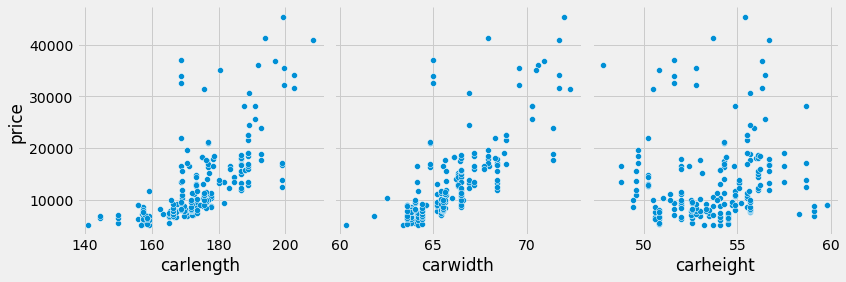

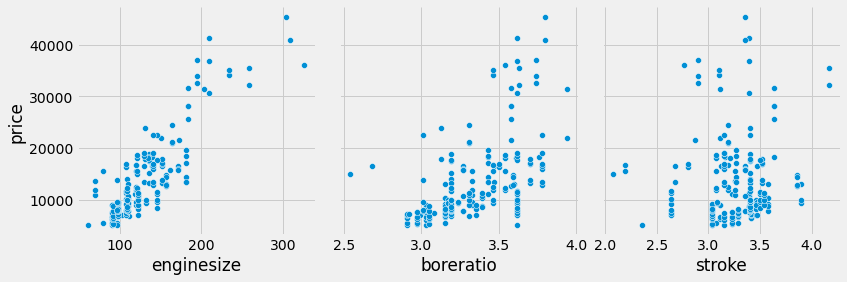

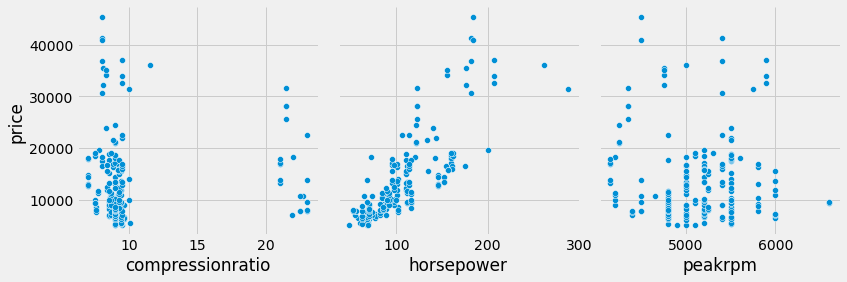

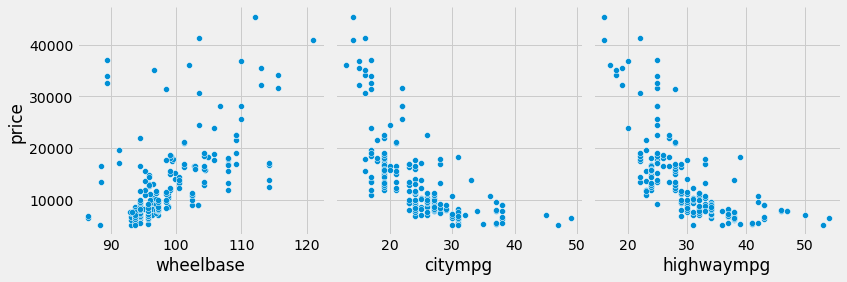

In [183]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()
pp('carlength','carwidth','carheight')
pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

-> carwidth, carlength, engine size, horsepower, curbweight & bore ratio seems to have a poitive correlation with price.
citympg & highwaympg has negative correlation with price.

### Calculate &  Add Mileage Column.

In [184]:
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45

### Dividing Car Companies Based on Average Price.

In [185]:
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,carsrange
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### Price vs Mileage Based on Drivewheel

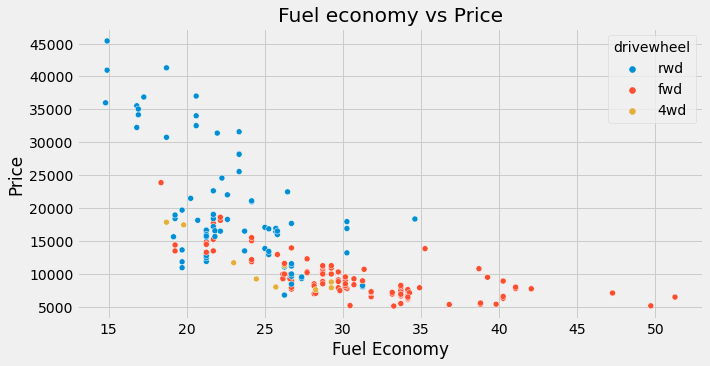

<Figure size 432x288 with 0 Axes>

In [186]:
plt.figure(figsize=(10,5))
plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['mileage'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout();

### Car Range vs Average Price

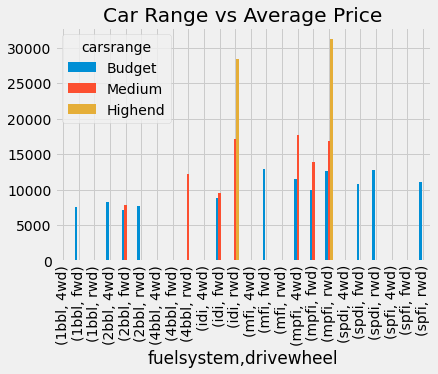

In [187]:
gd = pd.DataFrame(df.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
gd.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

### Dummy Variables.

In [188]:
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,carsrange
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [189]:
auto = df[['fueltype','aspiration','carbody','drivewheel','wheelbase','carlength','carwidth','curbweight','enginetype',
           'cylindernumber','enginesize','boreratio','horsepower','price','carsrange','mileage']]

In [190]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,carsrange,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495,Medium,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500,Medium,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500,Medium,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950,Medium,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450,Medium,19.80


In [191]:
def dummies(x,gd):
    dd = pd.get_dummies(gd[x], drop_first = True)
    gd = pd.concat([gd, dd], axis = 1)
    gd.drop([x], axis = 1, inplace = True)
    return gd

auto = dummies('fueltype',auto)
auto = dummies('aspiration',auto)
auto = dummies('carbody',auto)
auto = dummies('drivewheel',auto)
auto = dummies('enginetype',auto)
auto = dummies('cylindernumber',auto)
auto = dummies('carsrange',auto)

In [192]:
auto.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,88.6,168.8,64.1,2548,130,3.47,111,13495,23.70,1,...,0,0,0,1,0,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500,23.70,1,...,0,0,0,1,0,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500,22.15,1,...,1,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950,26.70,1,...,0,0,0,1,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450,19.80,1,...,0,0,1,0,0,0,0,0,1,0


In [193]:
auto.shape

(205, 31)

### Train Test Split

In [194]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [195]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
            'boreratio', 'horsepower', 'price','mileage']

### Scaling

In [196]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [197]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219309,0.358265,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


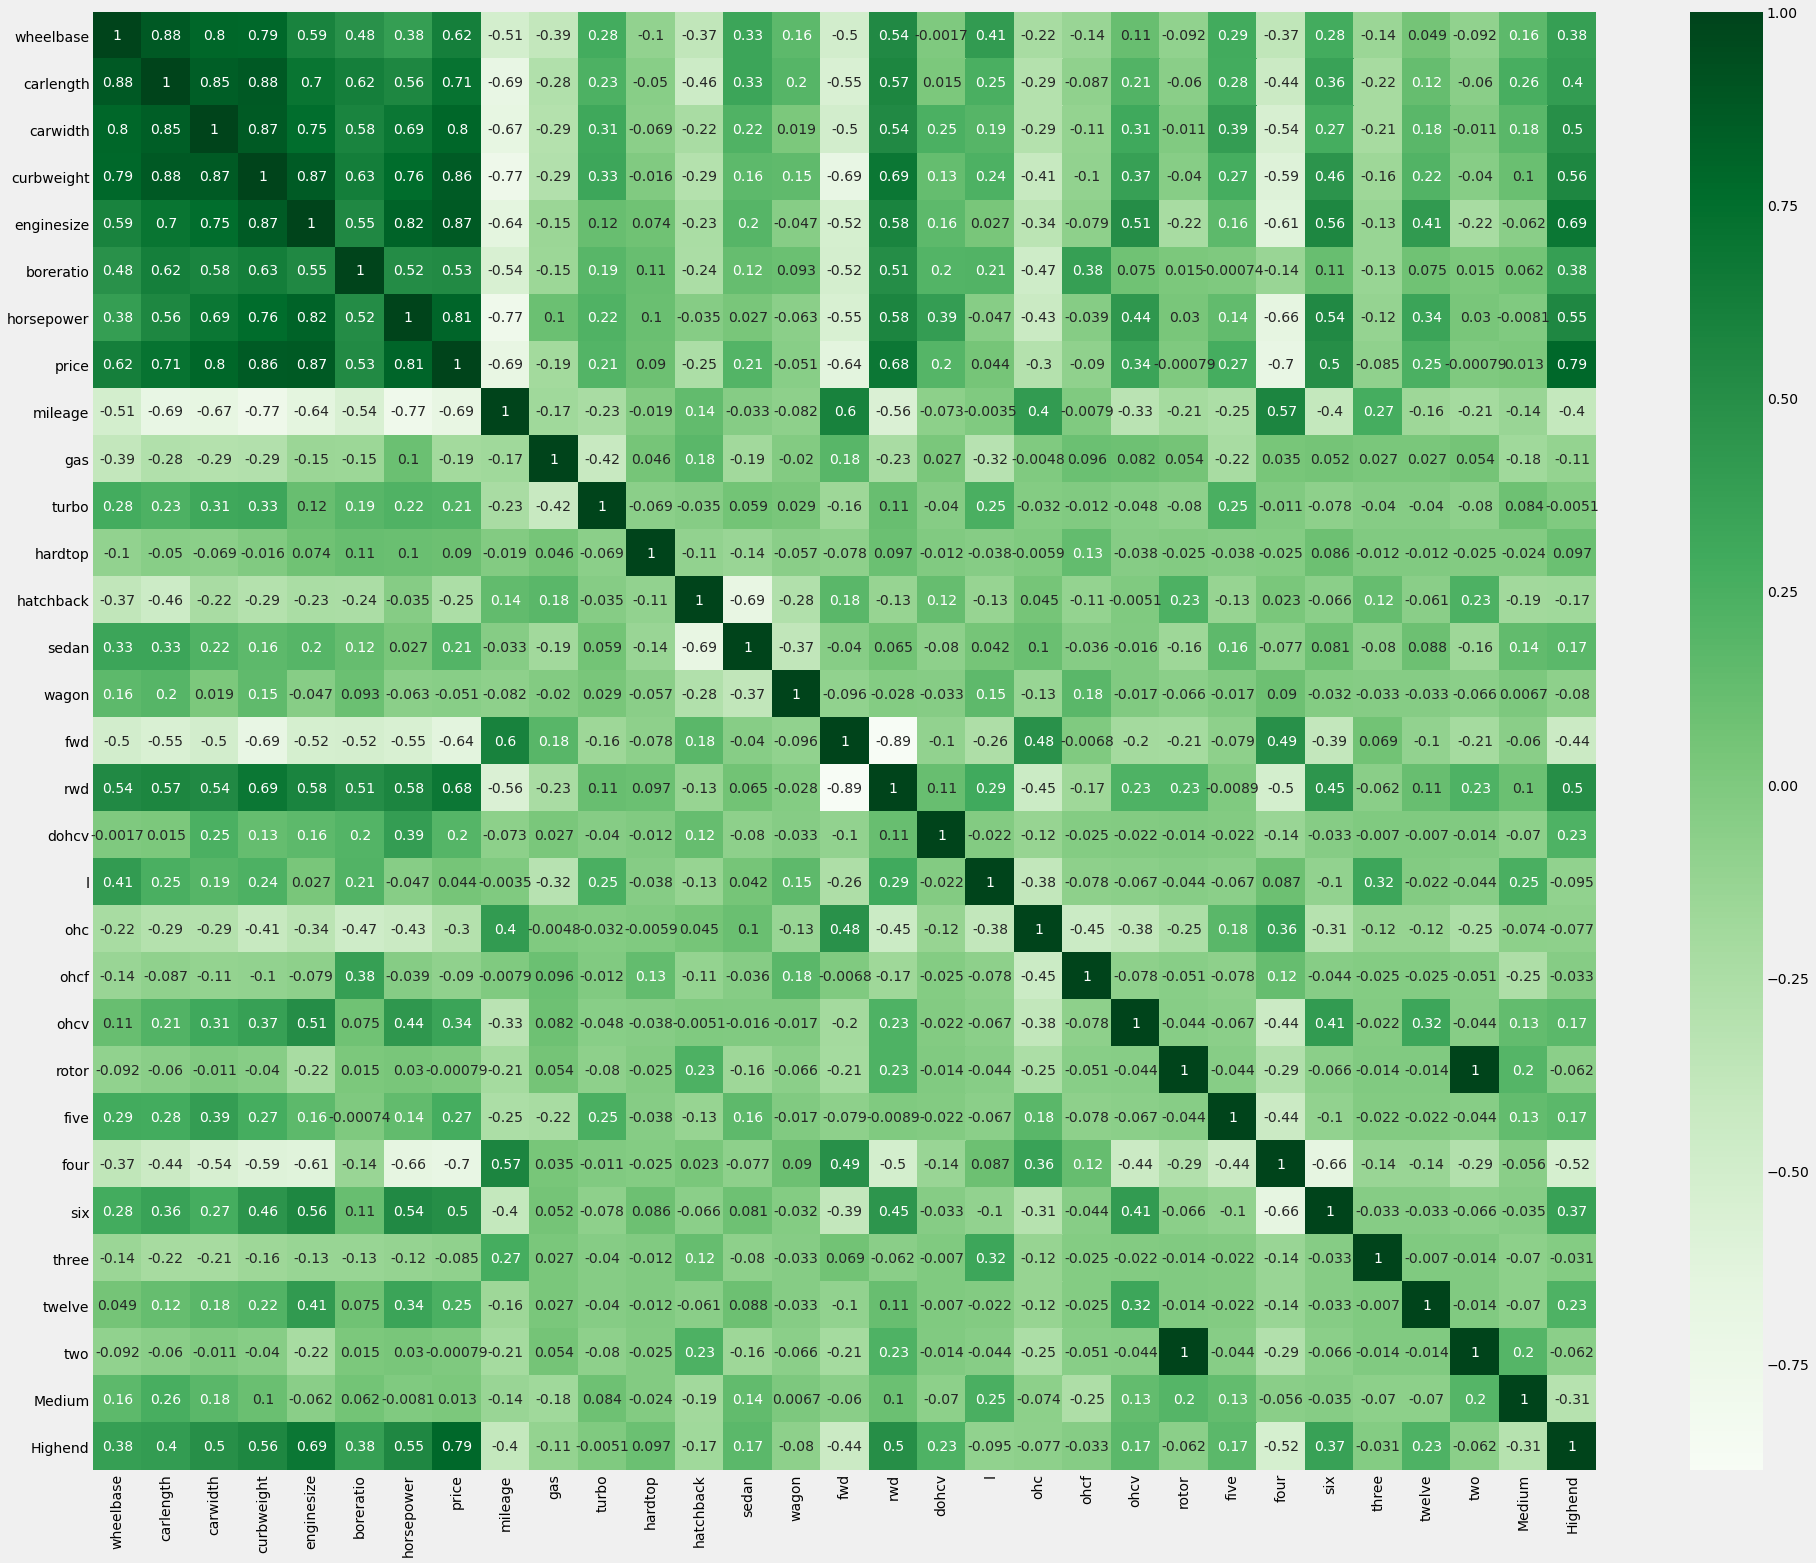

In [198]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

 -> Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

### Splitting Data into X & Y

In [199]:
y_train = df_train.pop('price')
X_train = df_train

### Model Building

In [200]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [201]:
X_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.530864,1,0,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.213992,1,0,...,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.344307,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.244170,1,0,...,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.122085,1,1,...,0,0,0,1,0,0,0,0,1,0


In [202]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [203]:
LR= LinearRegression()

In [204]:
LR.fit(X_train,y_train)

LinearRegression()

### RFE

In [205]:
rfe= RFE(LR,10)
rfe = rfe.fit(X_train, y_train)

In [206]:
rfe.support_

array([False, False,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [207]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [208]:
X_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'horsepower', 'mileage', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [209]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,horsepower,mileage,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.291667,0.272692,0.083333,0.530864,0,1,0,0,0,0
125,0.666667,0.500388,0.395833,0.213992,1,0,0,0,0,1
166,0.308333,0.314973,0.266667,0.344307,1,0,0,0,0,0
1,0.316667,0.411171,0.262500,0.244170,0,0,0,0,0,0
199,0.575000,0.647401,0.475000,0.122085,0,0,1,0,0,0


### Stat Model

#### VIF & Summery

In [210]:
import statsmodels.api as sm

### Model 1:

In [211]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) 
    return X

In [212]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.29e-70
Time:                        15:03:10   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.042     -2.243      0.0

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [214]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [215]:
checkVIF(X_train_new)

,Features,VIF
0,const,71.51
2,curbweight,8.38
6,sedan,6.18
3,horsepower,5.94
5,hatchback,5.68
1,carwidth,5.19
4,mileage,3.74
7,wagon,3.62
8,dohcv,1.73
10,Highend,1.68


-> Dropping curbweight which has highest VIF

In [216]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

### Model 2:

In [217]:
checkVIF(X_train_new)

,Features,VIF
0,const,70.87
5,sedan,6.17
4,hatchback,5.61
2,horsepower,5.11
3,mileage,3.66
6,wagon,3.50
1,carwidth,2.49
9,Highend,1.59
7,dohcv,1.54
8,twelve,1.26


 -> Dropping twelve which has p-value greater than 0.05

In [218]:
X_train_new = X_train_new.drop(["twelve"], axis = 1)

### Model 3:

In [219]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     188.4
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           5.43e-69
Time:                        15:03:12   Log-Likelihood:                 196.07
No. Observations:                 143   AIC:                            -374.1
Df Residuals:                     134   BIC:                            -347.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0568      0.043     -1.316      0.1

-> Dropping mileage which has p-value greater than 0.05

In [220]:
X_train_new = X_train_new.drop(["mileage"], axis = 1)

### Model 4:

In [221]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           4.70e-70
Time:                        15:03:12   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [222]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
2,horsepower,2.50
1,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


->  Dropping sedan which has highest VIF

In [223]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### Model 5:

In [224]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.68e-69
Time:                        15:03:13   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

->  Dropping wagon which has p-value greater than 0.05

In [225]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

### Model 6:

In [226]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.57e-70
Time:                        15:03:13   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [227]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


In [228]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)

### Model 7:

In [229]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.04e-67
Time:                        15:03:13   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [230]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.04
2,horsepower,2.22
1,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


### Prediction

In [231]:
LM = sm.OLS(y_train,X_train_new).fit()
y_train_pred = LM.predict(X_train_new)

In [232]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
            'boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [233]:
df_test[num_vars].head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage
160,0.313793,0.409756,0.341667,0.235066,0.139623,0.404762,0.091667,0.072382,0.747599
186,0.368966,0.497561,0.433333,0.305275,0.181132,0.404762,0.154167,0.093295,0.421125
59,0.420690,0.596748,0.516667,0.347944,0.230189,0.563492,0.150000,0.102964,0.381344
165,0.272414,0.448780,0.308333,0.301396,0.139623,0.444444,0.266667,0.115479,0.344307
140,0.231034,0.263415,0.291667,0.291699,0.177358,0.746032,0.104167,0.068652,0.368999


In [234]:
y_test = df_test.pop('price')
X_test = df_test

In [235]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)


In [236]:
y_pred = LM.predict(X_test_new)

In [237]:
y_pred

160    0.093095
186    0.156877
59     0.146618
165    0.156942
140    0.037418
         ...   
28     0.132705
29     0.251909
182    0.096349
40     0.059795
128    0.643575
Length: 62, dtype: float64

### Model Evalution

In [238]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.898667338035183

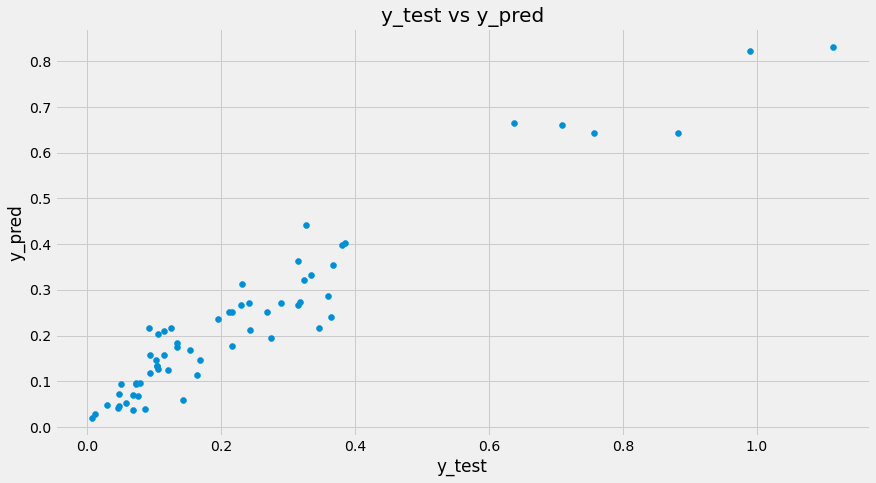

In [239]:
plt.figure(figsize=(13,7))
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)       
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [240]:
print(LM.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.04e-67
Time:                        15:03:15   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

-> R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.896(near to 1) that means model is good fit.

-> p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are    statistically significant.